In [102]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import Image
import os
import glob
plt.style.use('seaborn')

In [106]:
results = glob.glob('out2/run_*/metrics_*.csv')

In [107]:
regr_buffer = 10

def regr_slope(z):
    x = np.array(range(0, len(z)))
    y = z
    x_std = x.std()
    y_std = y.std()
    (r,_) = stats.pearsonr(x, y)
    return r * (y_std/x_std)

Int64Index([489], dtype='int64')
Int64Index([230], dtype='int64')


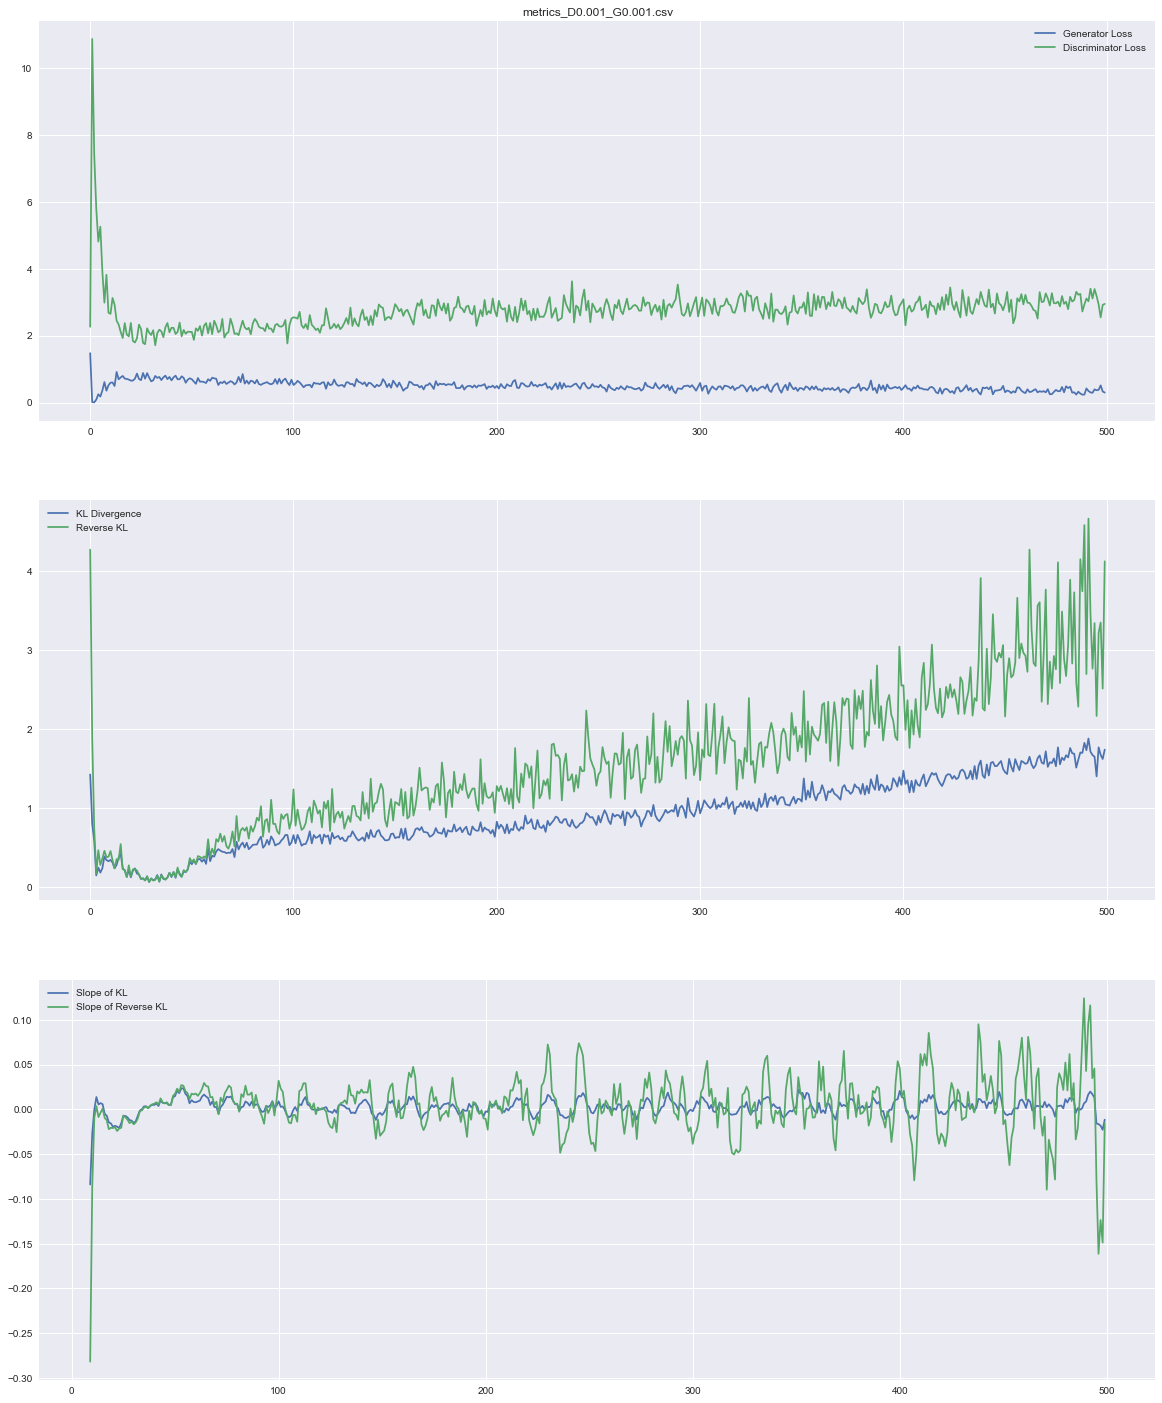

Int64Index([289], dtype='int64')
Int64Index([146], dtype='int64')


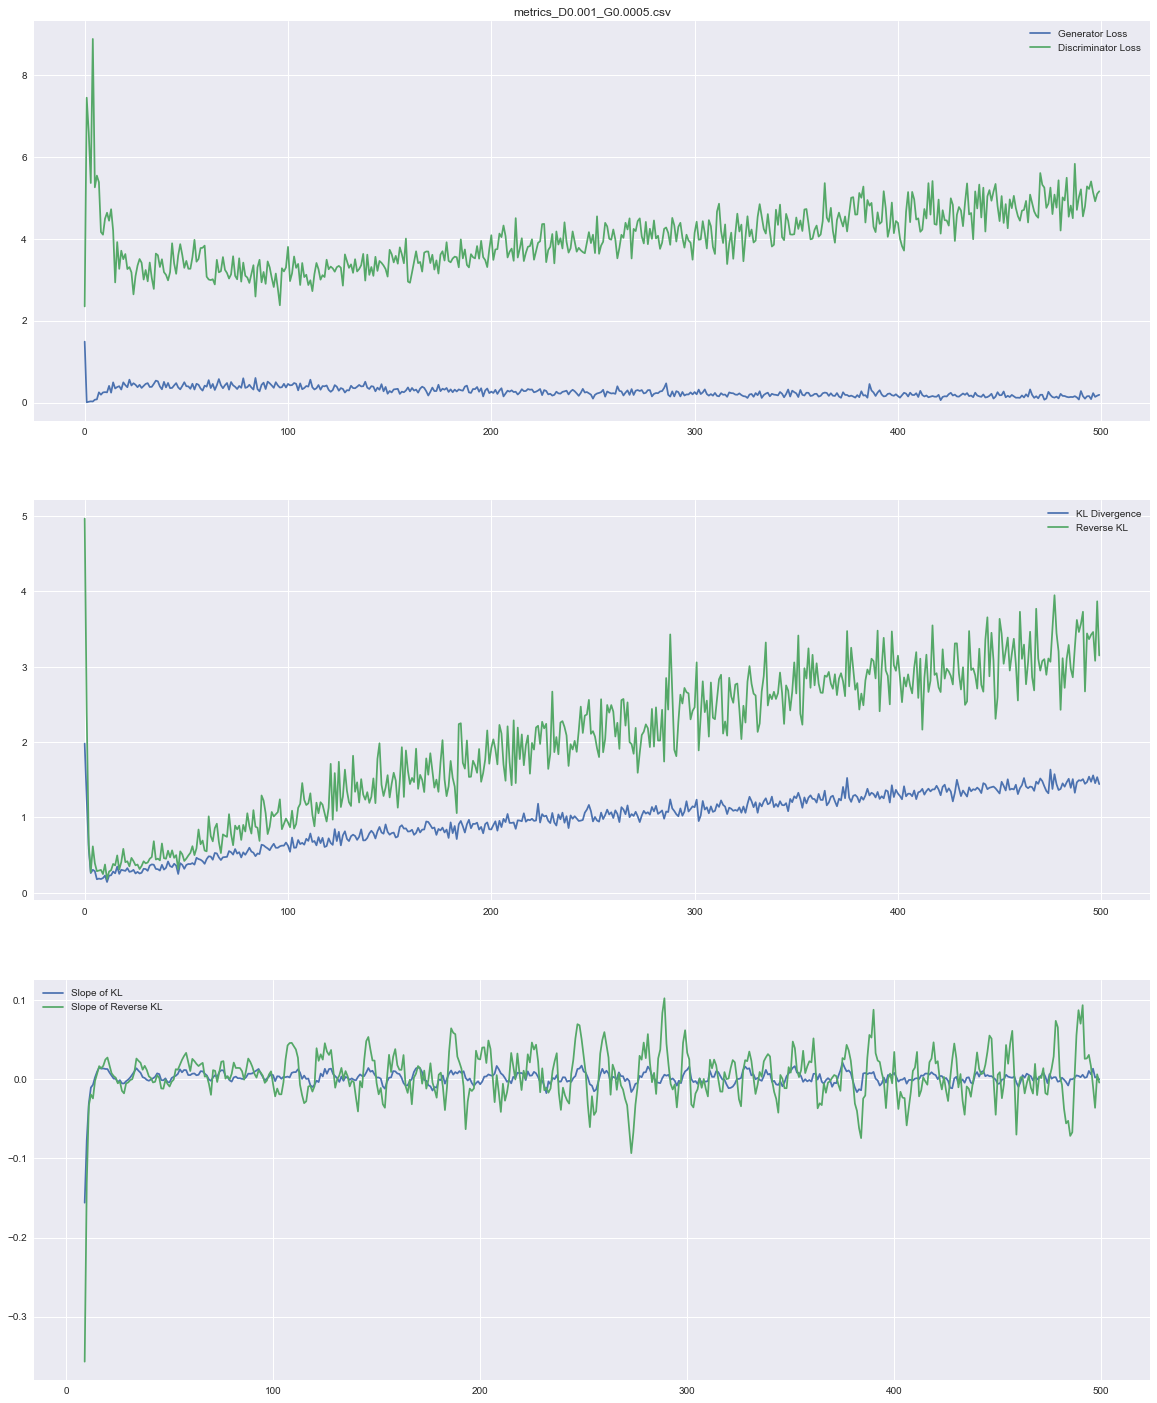

Int64Index([9], dtype='int64')
Int64Index([9], dtype='int64')


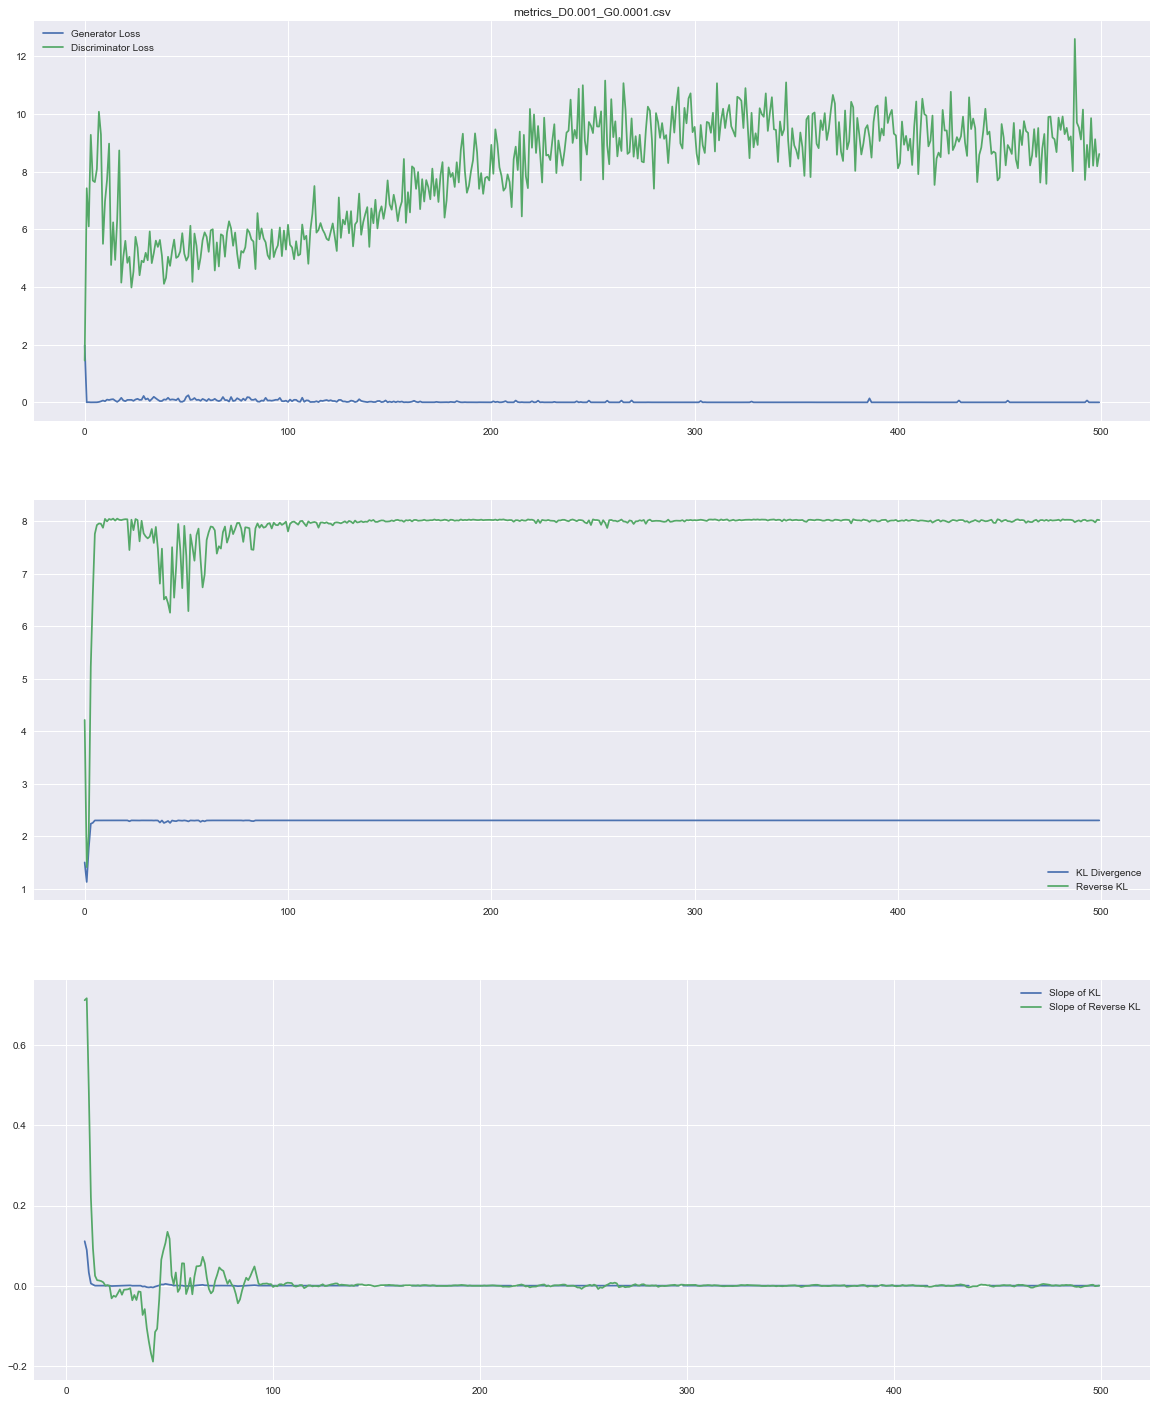

Int64Index([], dtype='int64')
Int64Index([201], dtype='int64')


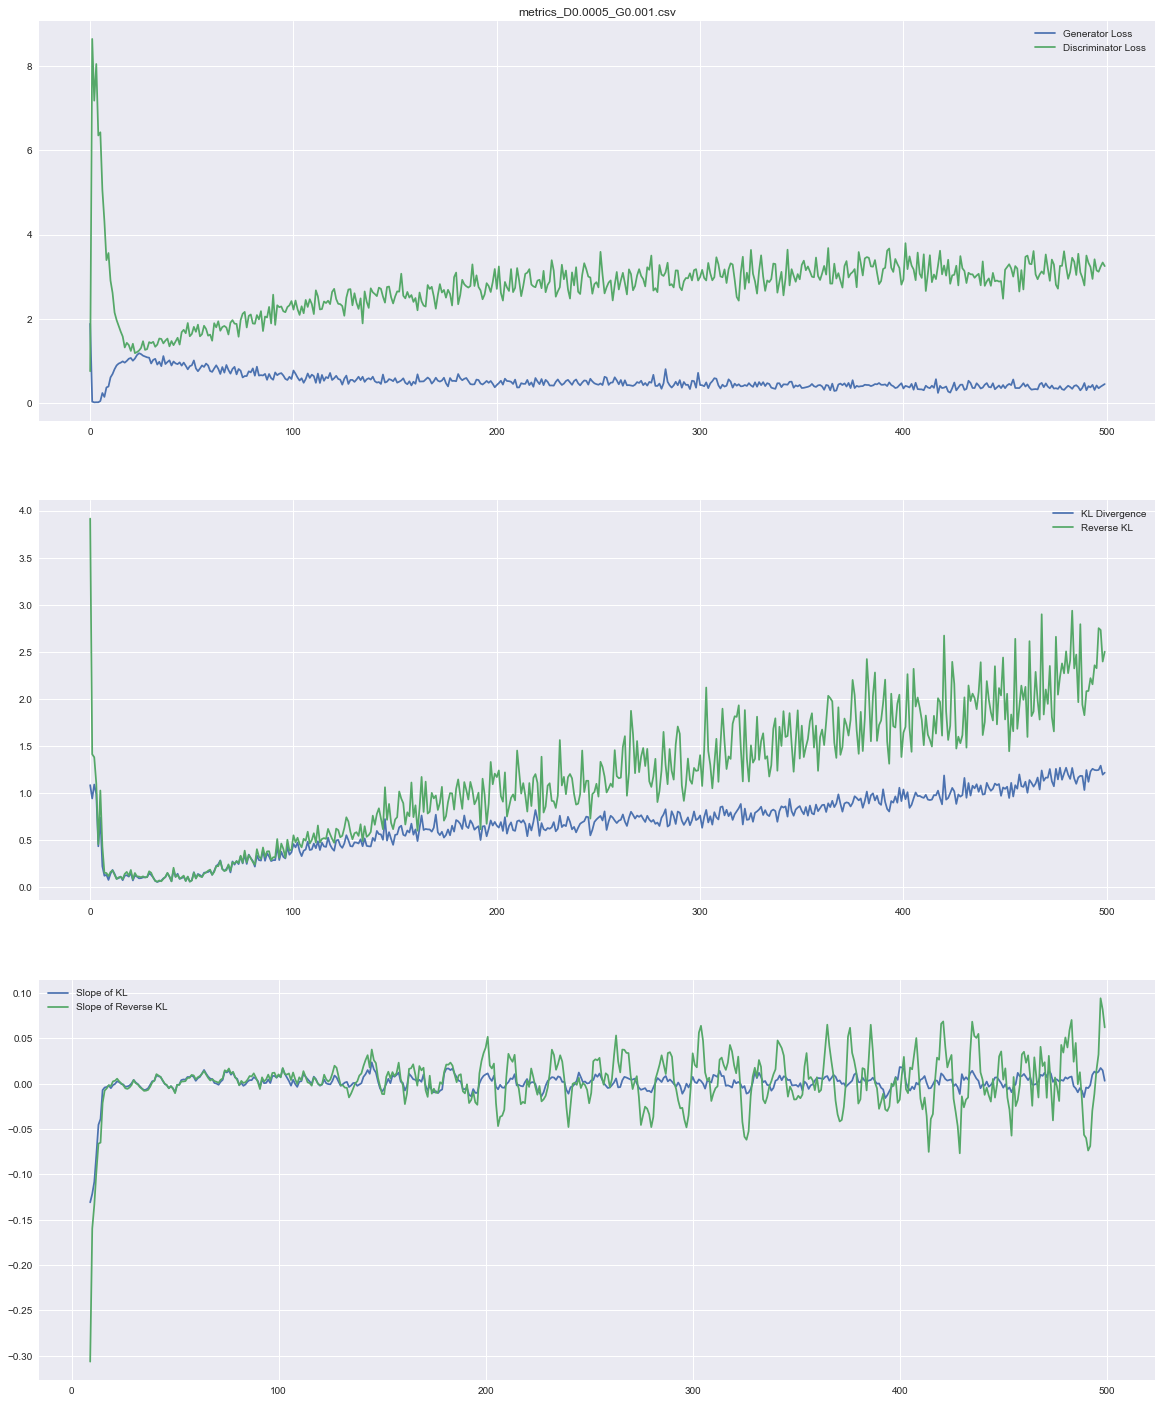

Int64Index([340], dtype='int64')
Int64Index([141], dtype='int64')


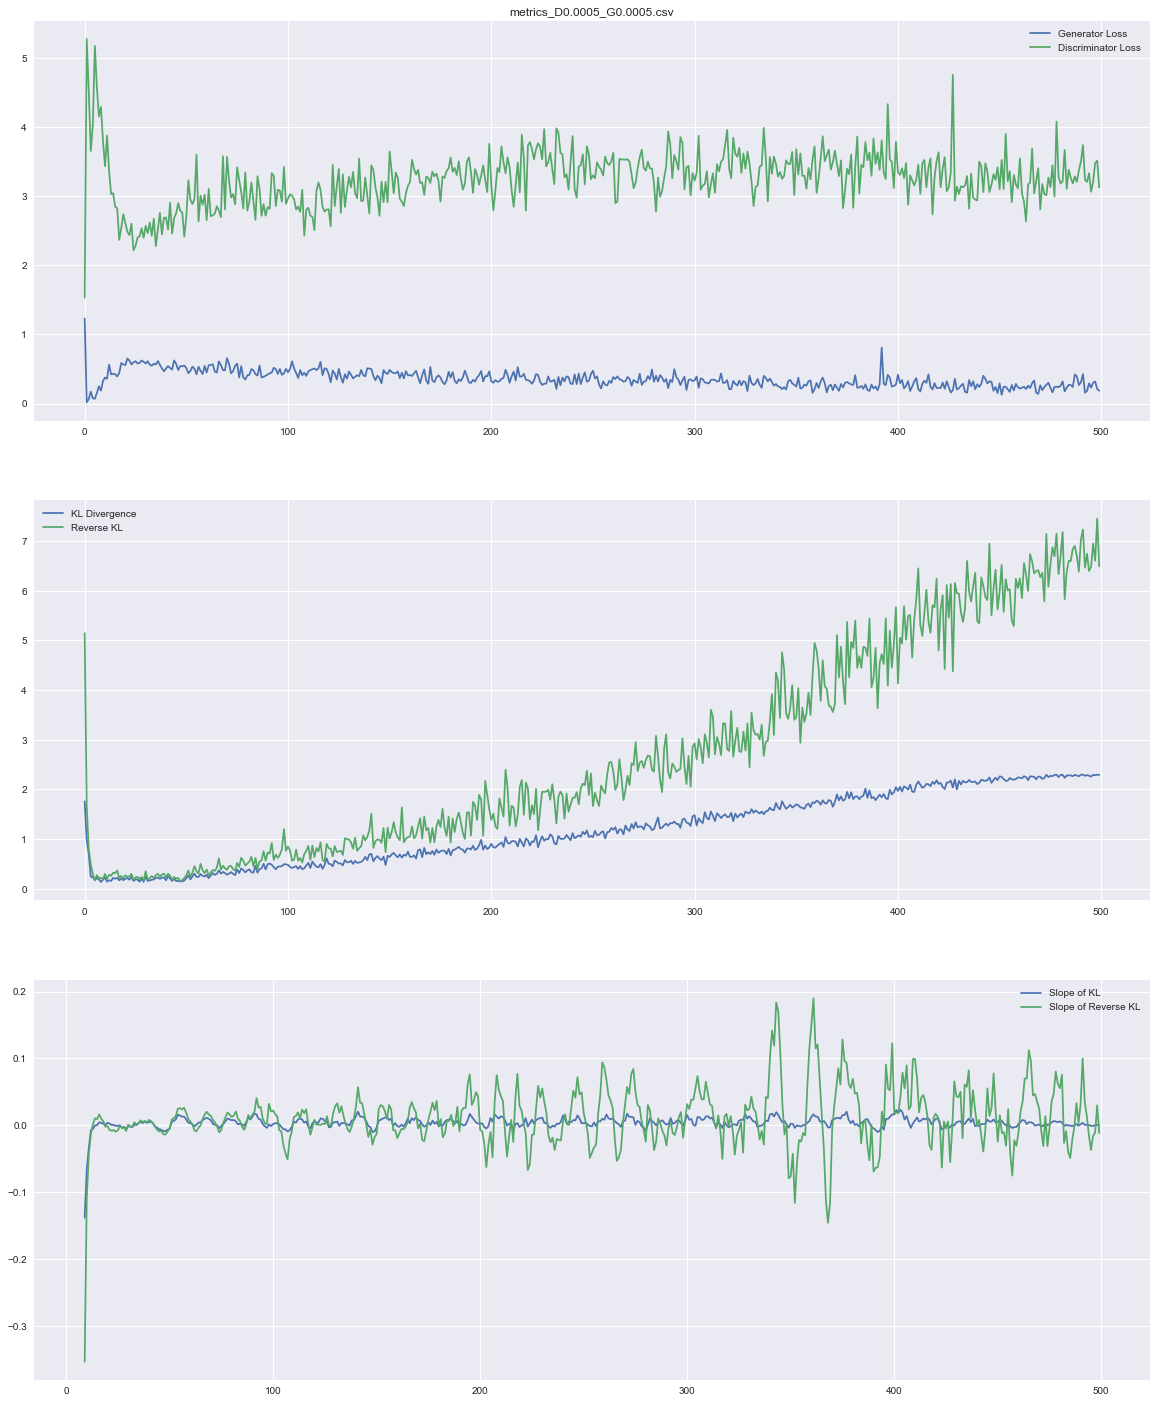

Int64Index([9], dtype='int64')
Int64Index([9], dtype='int64')


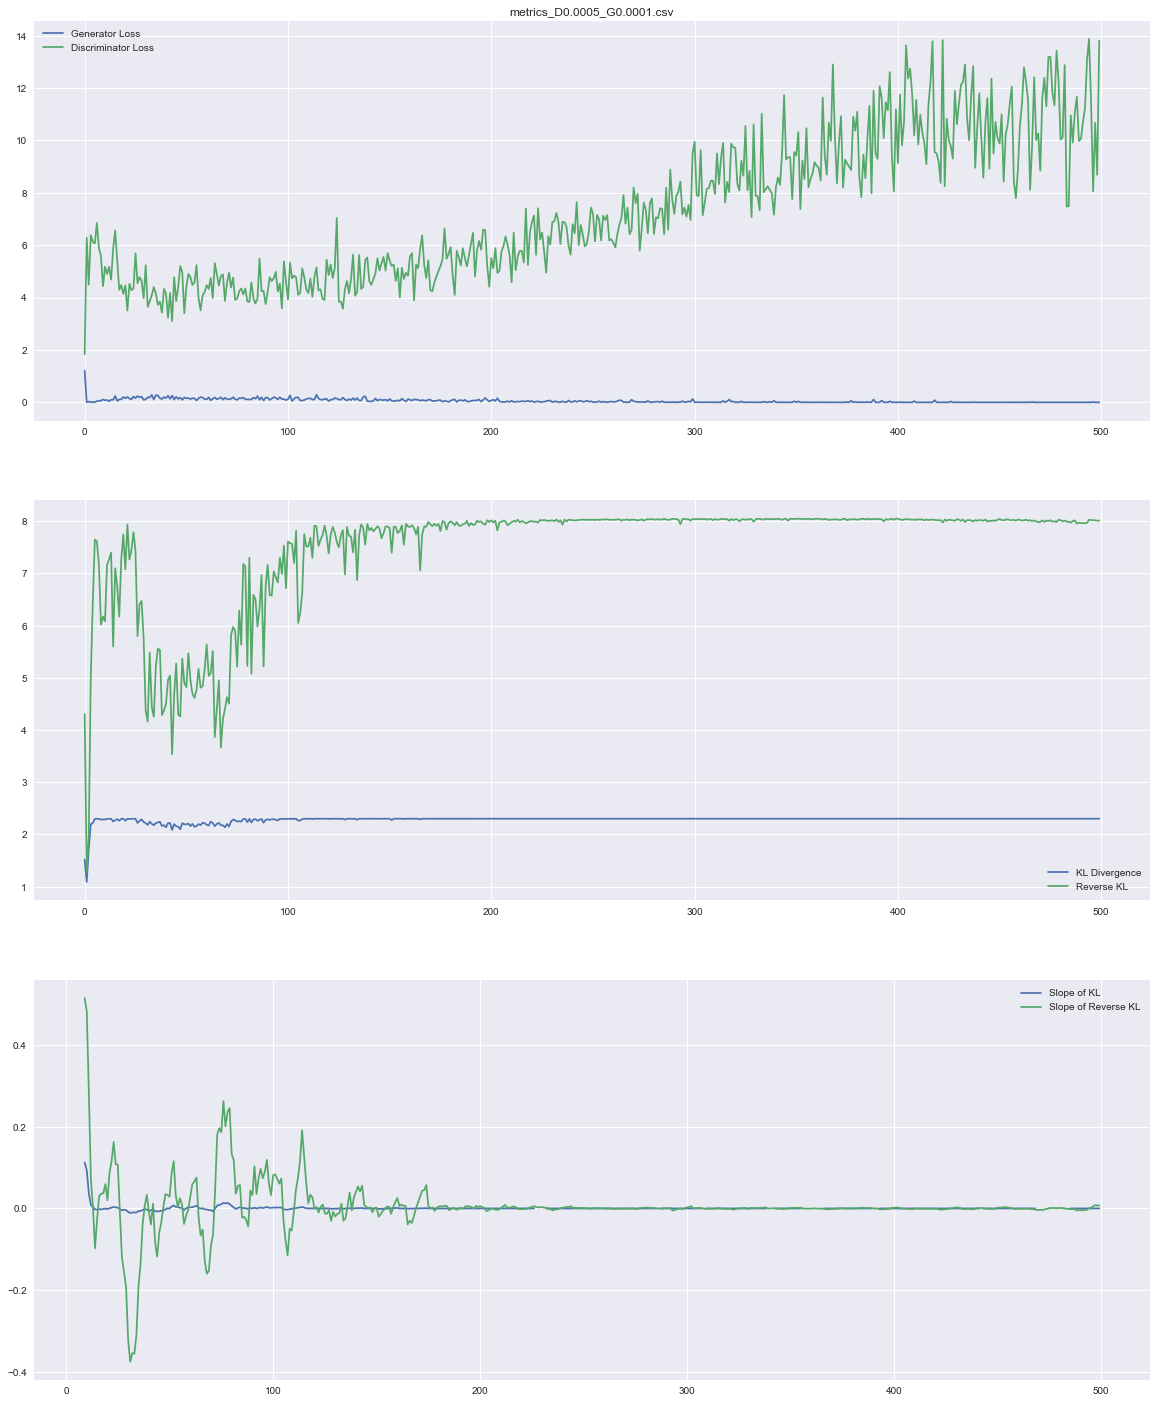

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


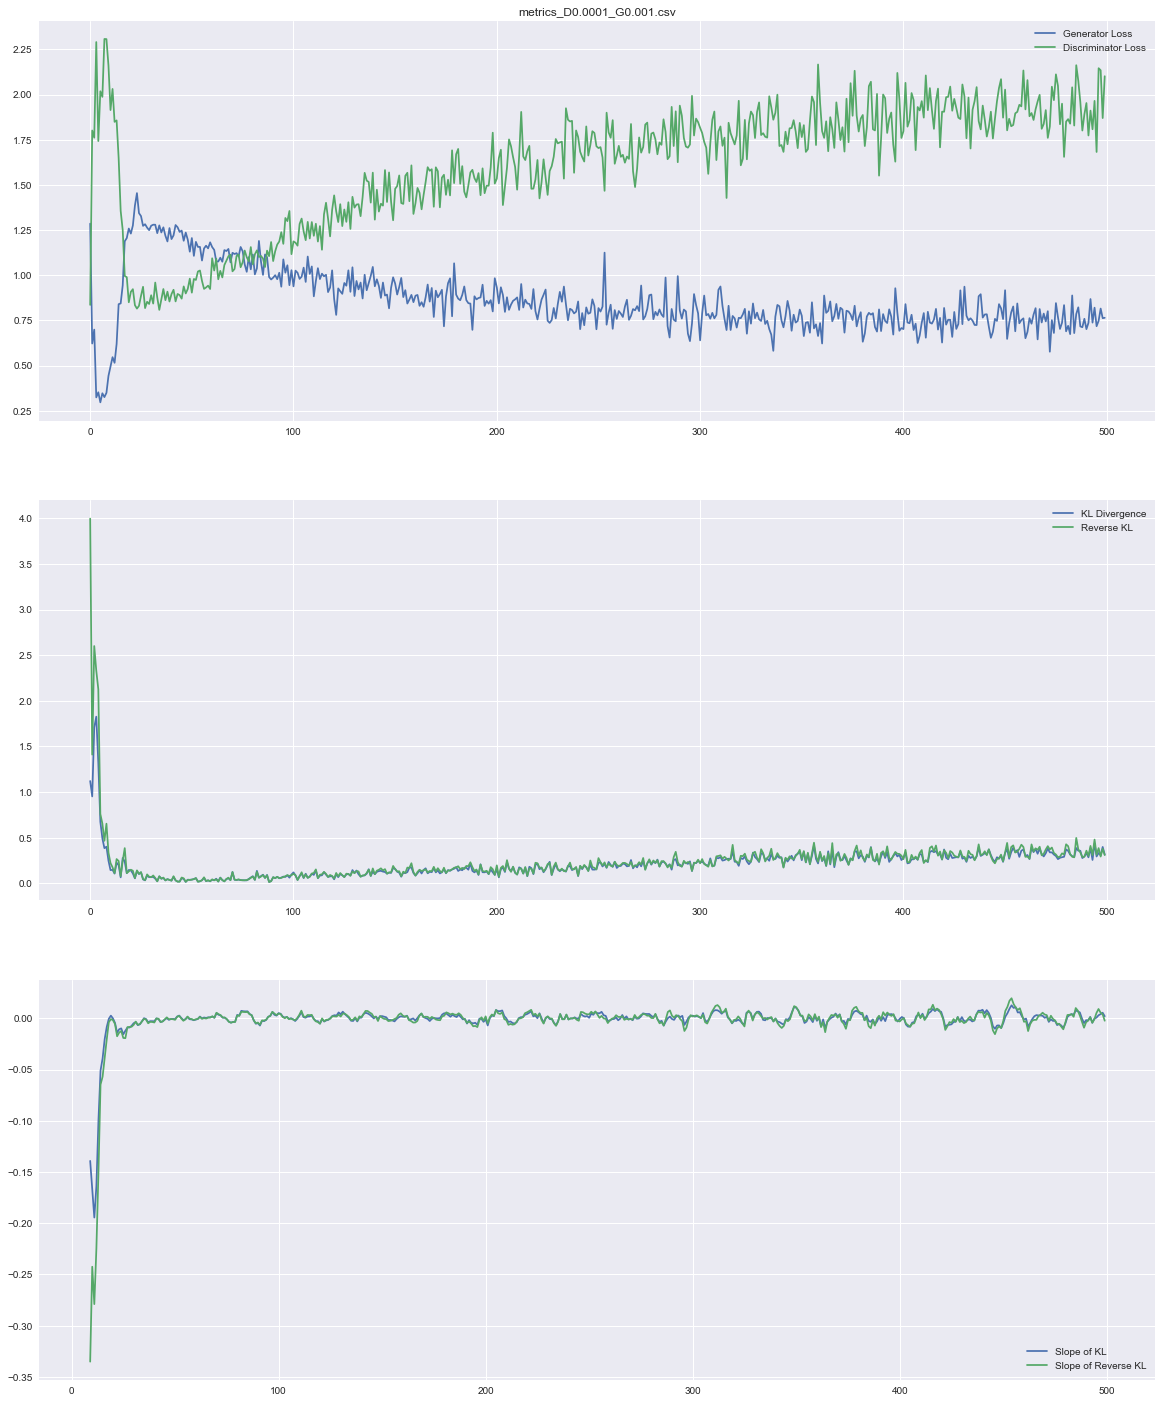

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


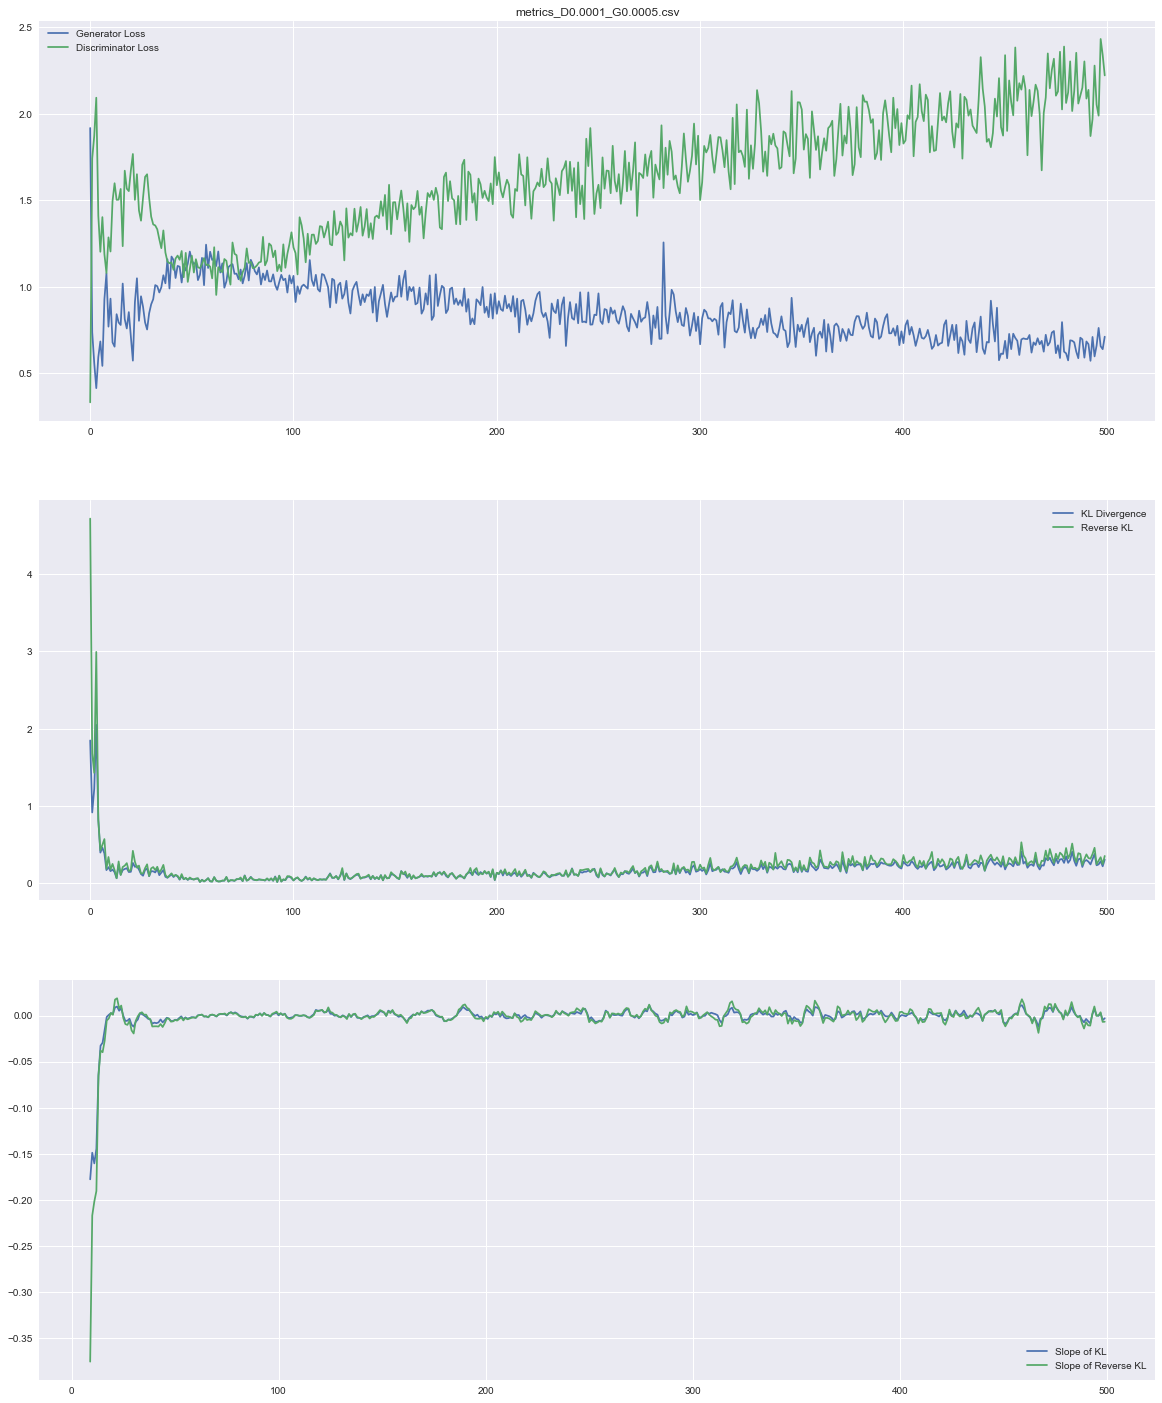

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


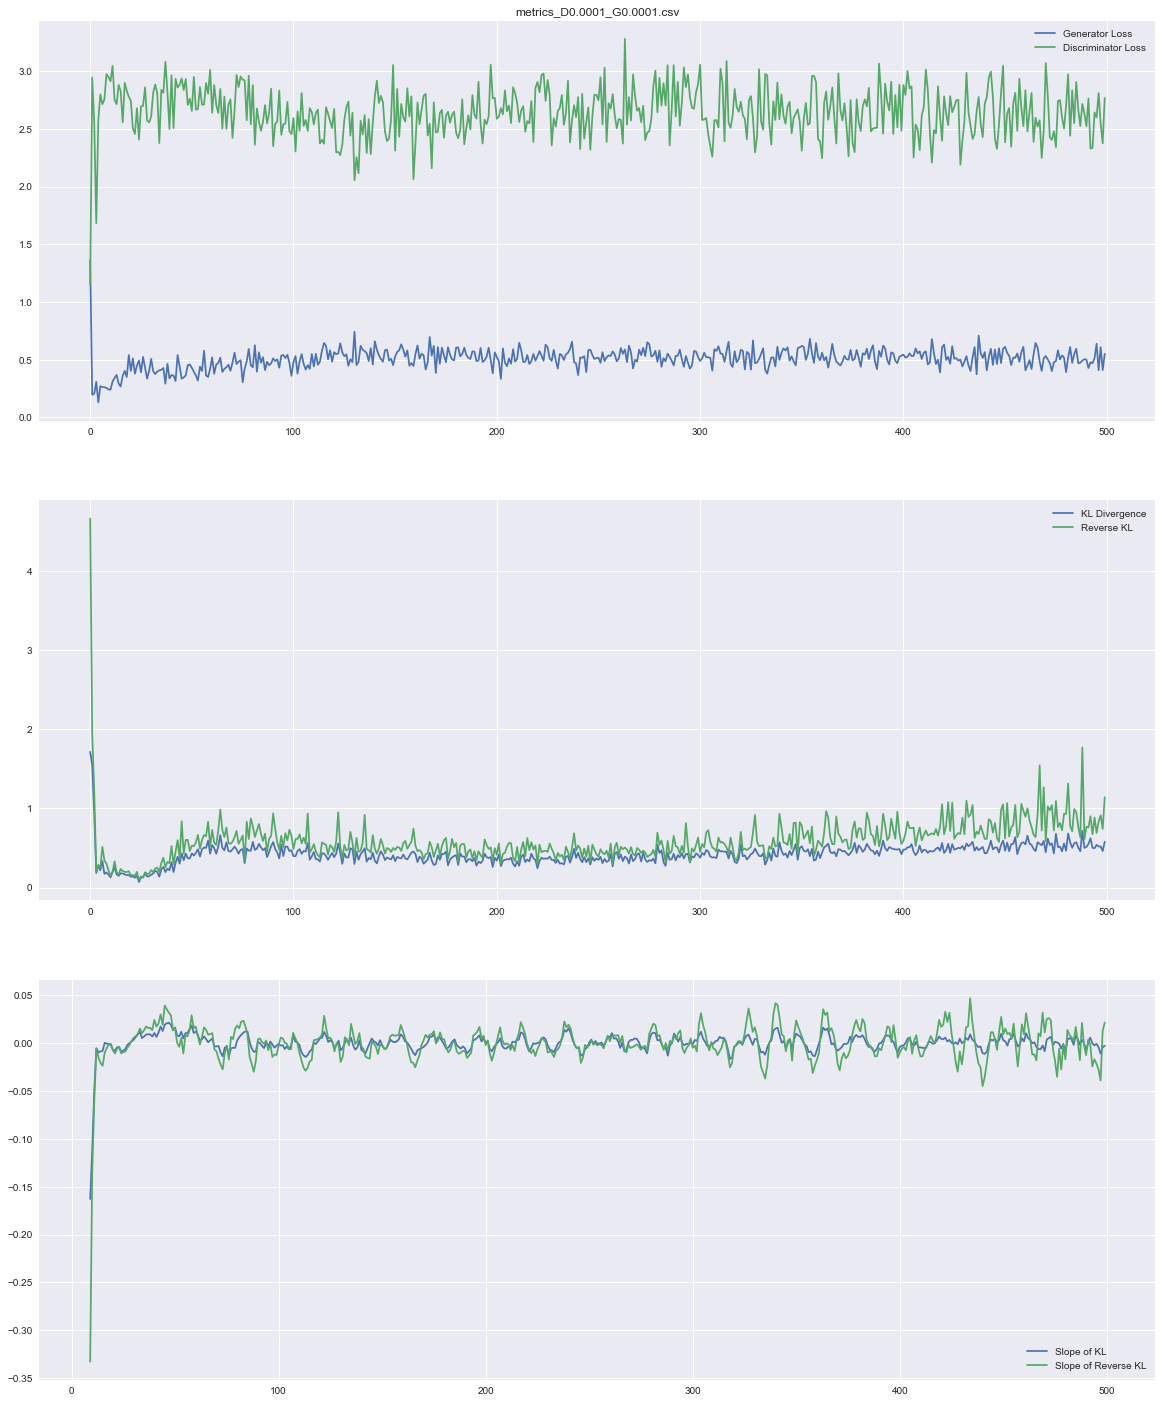

In [110]:
for r in results:
    
    # grab info
    location, filename = os.path.split(r)
    df = pd.read_csv(r)
    
    #calculations
    df['KLSlope'] = df['KLDivergence'].rolling(regr_buffer).apply(lambda z: regr_slope(z))
    df['RevKLSlope'] = df['RevKLDivergence'].rolling(regr_buffer).apply(lambda z: regr_slope(z))
    
    # plot...
    fig = plt.figure(figsize=(20,25))
    
    # losses
    ax = plt.subplot(3,1,1)
    plt.title(filename)
    ax.plot(df['# GLoss'], label='Generator Loss')
    ax.plot(df['DLoss'], label='Discriminator Loss')
    plt.legend()
    # metrics
    ax2 = plt.subplot(3,1,2)
    ax2.plot(df['KLDivergence'], label='KL Divergence')
    ax2.plot(df['RevKLDivergence'], label='Reverse KL')
    plt.legend()
    # slopes of metrics
    ax3 = plt.subplot(3,1,3)
    df['KLSlope_log_relu'] = np.log(df['KLSlope'].clip(lower=0.0001).values)
    ax3.plot(df['KLSlope'], label='Slope of KL')
    ax3.plot(df['RevKLSlope'], label='Slope of Reverse KL')
    print(df[ df['RevKLSlope'] > 0.1 ].head(1).index)
    print(df[ df['RevKLSlope'] > 0.05 ].head(1).index)
    #plt.xscale('log')
    plt.legend()
    
    plt.show()
    
    
